In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
card_details = pd.read_csv('Card Details.csv')

In [4]:
customer_details = pd.read_csv('Customer Details.csv',encoding='windows-1252')

# Joining Both Datasets.

In [5]:
df = customer_details.merge(card_details,on='CustomerID')

In [6]:
df.sample()

,Name,CustomerID,Age,Marital Status,Gender,Ethnicity,Education,Income,Limit,Rating,Cards,Balance
32020,Violetta,9625-QNLUXH,56,Married,Female,African American,Bachelor,101.989,9610,589,2,1529


# Cleaning data by removing duplicate, missing and irrelevant values.

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32547 entries, 0 to 32546
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            32547 non-null  object 
 1   CustomerID      32547 non-null  object 
 2   Age             32547 non-null  int64  
 3   Marital Status  32547 non-null  object 
 4   Gender          32547 non-null  object 
 5   Ethnicity       32547 non-null  object 
 6   Education       32547 non-null  object 
 7   Income          32547 non-null  float64
 8   Limit           32547 non-null  int64  
 9   Rating          32547 non-null  int64  
 10  Cards           32547 non-null  int64  
 11  Balance         32547 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 3.2+ MB


# Analyzing the data.

1. Descriptive Analysis.

In [10]:
df.describe()

,Age,Income,Limit,Rating,Cards,Balance
count,32547.000000,32547.000000,32547.000000,32547.000000,32547.000000,32547.000000
mean,55.476419,46.490372,4419.522322,326.720159,2.906658,447.894706
std,16.990896,37.140511,2202.441042,136.146945,1.325485,454.205934
min,25.000000,10.627000,1134.000000,119.000000,1.000000,0.000000
25%,42.000000,20.661500,2727.000000,224.000000,2.000000,5.000000
50%,55.000000,33.469000,4178.000000,316.000000,3.000000,331.000000
75%,69.000000,58.075000,5636.000000,405.000000,4.000000,749.000000
max,86.000000,160.231000,11200.000000,805.000000,7.000000,1597.000000


2. Data Visualization.

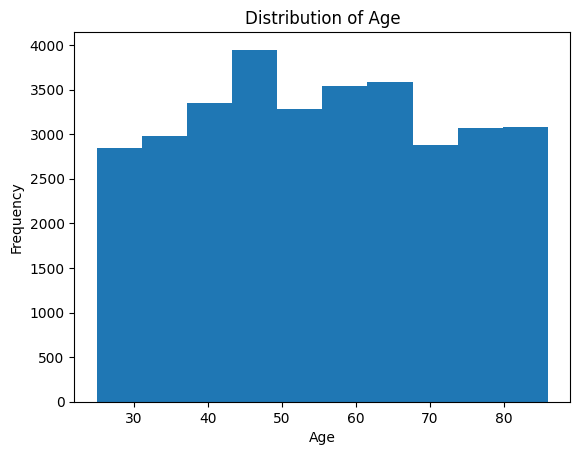

In [11]:
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# For better prediction we need to check the correlation between numerical columns.

C:\Users\HP\AppData\Local\Temp\ipykernel_8424\2271070662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


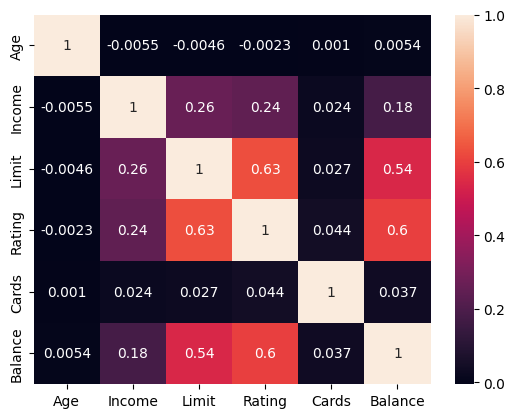

In [12]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# There are categorical columns like marital status ,gender, education, ethnicity which can effect the output column, so we need to convert these categorical columns to numerical columns by using lable encoder.

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
labelEncoder = LabelEncoder()
df['Marital Status'] = labelEncoder.fit_transform(df['Marital Status'])
df['Gender'] = labelEncoder.fit_transform(df['Gender'])
df['Ethnicity'] = labelEncoder.fit_transform(df['Ethnicity'])
df['Education'] = labelEncoder.fit_transform(df['Education'])

After converting categorical columns into numerical columns, we need to check the corelation between each column and droping the columns which have least corelation with the output column which is Limit.

C:\Users\HP\AppData\Local\Temp\ipykernel_8424\2271070662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


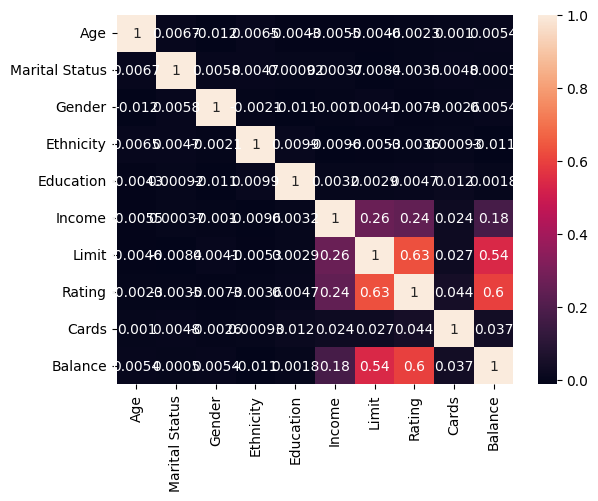

In [15]:
sns.heatmap(df.corr(),annot=True)
plt.show()

Only income, balance and rating has more than 20% of corelation with Limit. So, for better prediction we need to drop other columns.

In [16]:
ndf = df[['Rating','Income','Balance','Limit']]

Converting ndf to new csv for further predections methods.

In [17]:
ndf.to_csv('Predection File.csv',index=False)

As we can see there are two input columns, so we cannot use Linear Regression, Logistics Regression and Polynomial Regression.
We are starting with Multiple Regression.

# Multiple Regression.

Correlation between input columns and output columns.

In [18]:
ndf

,Rating,Income,Balance,Limit
0,734,105.038,232,9142
1,389,69.820,924,4223
2,253,17.441,20,2430
3,248,39.368,813,3829
4,258,56.375,109,2850
...,...,...,...,...
32542,308,32.930,162,4222
32543,311,12.469,487,5645
32544,285,64.167,576,3116
32545,161,20.970,0,1356


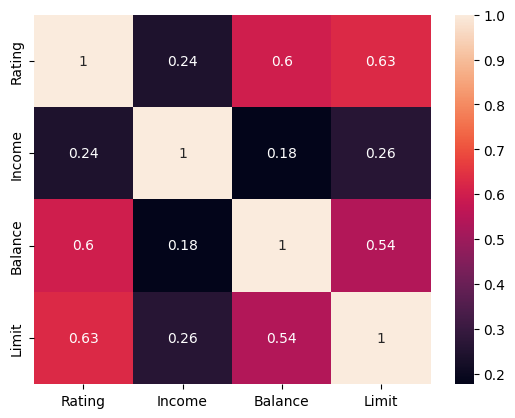

In [19]:
sns.heatmap(ndf.corr(),annot=True)
plt.show()

Importing important libraries for predection.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [21]:
x = ndf.drop('Limit',axis=1)
y = ndf['Limit']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred = linear_reg.predict(x_test)

In [25]:
error = mean_squared_error(y_pred,y_test)

In [26]:
math.sqrt(error)

1613.9619633671227

In [27]:
linear_reg.predict([[734,105.038,232]])

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7526.14910358])

# Decision Tree and Random Forest.

Importing necessary liberaries.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [29]:
x = ndf.drop('Limit',axis=1)
y = ndf['Limit']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [31]:
decisionTreeClassifier = DecisionTreeClassifier()
decisionTreeClassifier.fit(x_train,y_train)

In [ ]:
y_pred = decisionTreeClassifier.predict(x_test)

In [ ]:
accuracy_score(y_pred,y_test)

0.0019969278033794163

In [ ]:
decisionTreeClassifier.predict([[261,35,76]])

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([3226], dtype=int64)

# Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x = ndf.drop('Limit',axis=1)
y = ndf['Limit']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)

MemoryError: could not allocate 1852571648 bytes